/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in true_divide


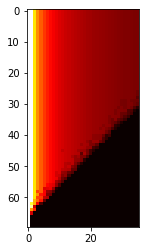

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats as st
def encode_mask(mask):
    encoding = np.where(mask)
    return encoding

def decode_mask(encoding, K):
    mask = np.zeros(K, dtype=bool)
    for i in encoding:
        mask[i] = True
    return mask

def random_LT_encode_once(message):
    K = len(message)
    mask = np.random.randint(0, high = 2, size = [K], dtype = bool)
    symbol = np.logical_xor.reduce(mask*message)
    encoded_mask = encode_mask(mask)
    return encoded_mask, symbol

def random_LT_encode(message, N):
    # returns N output symbols using the random LT code
    encoded_mask = []
    transmit = []

    for i in range(N):
        encoded_mask_i, transmit_i = random_LT_encode_once(message)
        encoded_mask.append(encoded_mask_i)
        transmit.append(transmit_i)
    transmit = np.array(transmit)

    return encoded_mask, transmit

def SolveGaussElim(A, b):
    N, K  = A.shape
    Ab = np.concatenate((A, b), axis = 1)

    for i in range(K):
        below_diag = Ab[i:N, i]
        if not np.any(below_diag):
            return None

        row_1 = below_diag.nonzero()[0][0]
        if not ((row_1 + i) == i):
            upper_row = Ab[i, :].copy()
            lower_row = Ab[row_1+i, :].copy()
            Ab[row_1+i, :] = upper_row
            Ab[i, :] = lower_row


        for j in range(N):
            if Ab[j, i] == True and (j!=i):
                Ab[j,:] = Ab[j,:] ^ Ab[i,:]

    Ab = Ab[0:K, :] # discarding rows below last pivot
    x = Ab[:,K]
    return x

def ML_decode(received, K):
    encoded_masks, symbols = received
    masks = [decode_mask(i, K) for i in encoded_masks]
    A = np.vstack(masks)
    b = np.vstack(symbols)
    # Implement Gaussian Elimination Ax = b
    return SolveGaussElim(A, b)

def BP_decode(received, K):
    pass

N=70
K=40
itr=10
array=np.zeros((N,K),dtype='float')
def Binary(K,N):
    message = np.random.randint(0, high = 2, size = [K], dtype = bool)
    transmitted = random_LT_encode(message, N)
    received = transmitted
    decoded = ML_decode(received, K)
    success = True
    if decoded is None:
        success = False
    return success

for n in range(1,N+1):
    for k in range(1,K):
        x=[]
        for i in range(itr):
            y=Binary(k,n)
            x.append(y)
        array[N-n,k-1]=np.mean(x)

array=array[:,3:K-1]
for k in range(array.shape[1]):
    array[:,k]=array[:,k]/k**0.5
# ax.invert_yaxis()
plt.imshow(array, cmap='hot', interpolation='nearest')
# x=np.arange(1,K)
# y=(x)*np.log(x)
# plt.plot(x,y)
plt.show()


#K = 6
# epsilon = 0.5
# N = 8 # int(K*(1+epsilon))
# message = np.random.randint(0, high = 2, size = [K], dtype = bool)
# print(message)

def Binary(K,N):
    message = np.random.randint(0, high = 2, size = [K], dtype = bool)
    transmitted = random_LT_encode(message, N)
    received = transmitted
    decoded = ML_decode(received, K)
    success = True
    if decoded is None:
        success = False
    return success




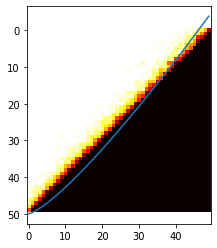

In [ ]:
array1=array[150:201,0:50].copy()
# array1[array1<0.5]=0
# array1[array1<0.8]=0.3
# array1[array1<0.9]=0.9
# array1[array1<=0.9]=0
x=np.arange(0,50)
y=50-0.275*((x+1)*np.log(x+1))
plt.imshow(array1, cmap='hot', interpolation='nearest')
plt.plot(x,y)